In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

# Generating parameter points with respect to Ruth's approximate curve

In [3]:
# Defining the function that creates points with a shift in alpha (vertical) direction
def pointsFromApprox(inputfile, outputfile, alphaShift):
    approxPoints = np.array(genfromtxt(inputfile))
    approxPoints[:,1] += alphaShift
    with open(outputfile, 'w+') as fout:
        fout.write("#m(phi) [GeV]\talpha\n")
        np.savetxt(fout, approxPoints, fmt='%7f')

In [4]:
# Applying to the shifts of our chice
shifts=[10**(-4),-10**(-4)]
#print(shifts.shape)
for shiftnum, shift in enumerate(shifts):
    pointsFromApprox("m-alpha_points/B-K_exclusion_Ruth.dat","m-alpha_points/B-K_new_{}.dat".format(shiftnum),\
                     shift)

# Plotting the exclusion scatter plot

In [12]:
# function to plot the allowed/excluded points
def plotAllowed(inputfile):
    params = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    allowed=params[:,5]>0

    plt.scatter(params[allowed,0], params[allowed,1], c='green')
    plt.scatter(params[~allowed,0], params[~allowed,1], c='red')

Text(0, 0.5, '$\\alpha$')

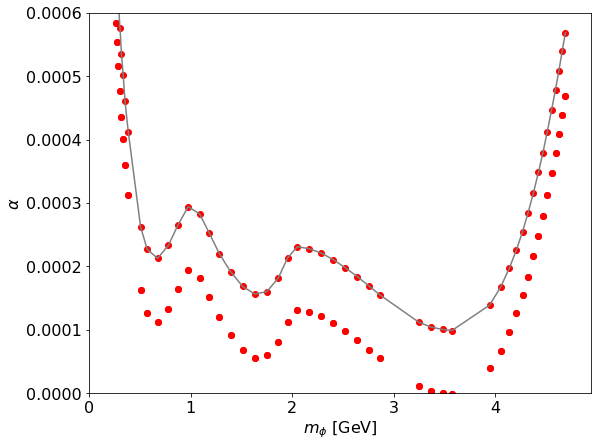

In [26]:
#Plotting for the parameters studied
plt.figure(figsize=(9, 7))

#Ruth'sexclusion 
approxExcl=np.array(genfromtxt("m-alpha_points/B-K_exclusion_Ruth.dat",  comments="#", delimiter='\t'))
#print(approxExcl)
plt.plot(approxExcl[:,0], approxExcl[:,1], c='grey')


plotAllowed("Experimental_files/output_combined/B-K_exclusion_Ruth_full_comb.dat")
plotAllowed("Experimental_files/output_combined/B-K_new_1_full_comb.dat")
plotAllowed("Experimental_files/output_combined/B-K_new_1_full_comb.dat")


#plt.xlim( (0, 400))
plt.ylim((0,6*10**(-4)))

#plt.title(''.format(i))
plt.xlabel('$m_\\phi$ [GeV]')
plt.ylabel('$\\alpha$')